# Cost 변화 양상

## 1. Linear regression

- Linear regression은 최적의 weight vector를 찾기 위해 cost를 최소화하게 된다.
- Squared loss를 활용해 Gradient descent algorithm을 돌리게 되고 최적의 weight를 찾을 수 있다.
- cost의 변화가 아래로 볼록한 convex 형태를 가지기 때문에 가능하다.

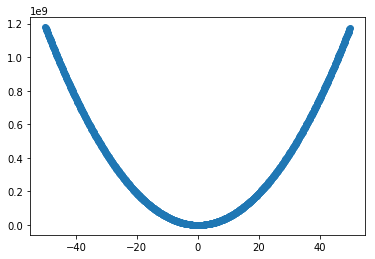

In [2]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def f(x, coef):
    return x * coef

data = np.loadtxt('students.txt', delimiter=' ', skiprows=1)

X = data[:, 1]
Y = data[:, -1]

costs = []

for coef in np.arange(-50, 50, 0.1):
    tmp = 0
    for i in range(len(X)):
        tmp += (Y[i] - f(X[i], coef)) ** 2
    costs.append(tmp)

plt.scatter(np.arange(-50, 50, 0.1), costs)
plt.show()

- 데이터는 학생 성적 데이터이고, Y는 성적, X는 공부시간이다.
- 모델은 단순히 `y = w * x` 꼴로 intercept 없이 만들었다.
- 그래프의 X축은 w 값이고, Y축은 Squared loss의 sum이다. w 값을 -50에서 50까지 0.1 간격으로 변화시켜가며 Squared loss의 sum의 변화를 관찰했다.
- 아래로 볼록한 convex 꼴을 볼 수 있다.

## 2. Logistic regression

- Logistic regression의 경우 같은 방법을 쓰는 것이 불가능하다. 그것을 보이고자 한다.
- 한 마디로 정리하면 sigmoid 함수의 모양(S자의 non convex 형태) 때문에 beta 벡터에 따른 cost 값이 non convex 형태로 나타나기 때문이다.

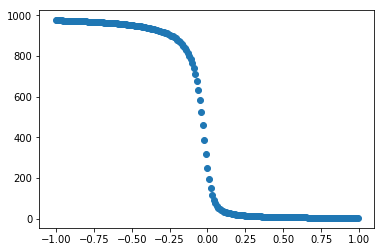

In [3]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def f(x, coef):
    return coef * x

# sigmoid function
def g(x, coef):
    return 1 / (1 + math.exp(-f(x, coef)))

X = np.arange(-50, 50, 0.1)
Y = np.array(list(map(lambda x: 0 if x < 0 else 1, np.arange(-50, 50, 0.1))))

costs = []
for coef in np.arange(-1, 1, 0.01):
    c = 0
    for i in range(len(X)):
        c += (Y[i] - g(X[i], coef)) ** 2
    costs.append(c)

plt.scatter(np.arange(-1, 1, 0.01), costs)
plt.show()

- 데이터는 직접 생성했다. 쉽게 X가 음수면 Y는 0, 양수면 1인 (x, y) 쌍이다.
- f 함수는 단순한 `y = w * x` 꼴의 형태고, g 함수를 sigmoid 함수 형태로 만들었다.
- weight 값을 변화시켜가면서 cost 변화를 관찰했다(-1에서 1까지 0.01 간격)
- Squared loss의 sum이 Y축 값으로 찍히게 되는데 위 그래프를 보면 알 수 있듯이 non-convex이다.
- 즉 linear의 cost 변화는 convex 꼴이라서 gradient descent 적용이 가능하고, logistic의 cost는 non-convex 꼴이라서 안된다.